# Predicting Medical Insurance Charges

In this notebook, we analyze a dataset of insurance applicants to build a model that predicts medical costs. We explore the relationships between personal attributes and expenses, clean and preprocess the data, and train a regression model to estimate costs.


#Importing The Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#Data Collection And Analysis

In [ ]:
#loading the dataset into a pandas dataframe
insurance_df=pd.read_csv('/content/insurance.csv')

In [ ]:
#printing first five rows of the dataset
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#number of rows and columns
insurance_df.shape

(1338, 7)

In [ ]:
#getting some information about the dataset
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:
- Sex
- Smoker
- Region

#Data Analysis

In [ ]:
#statistical measures about the dataset
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'Age Distribution')

<Figure size 600x600 with 0 Axes>

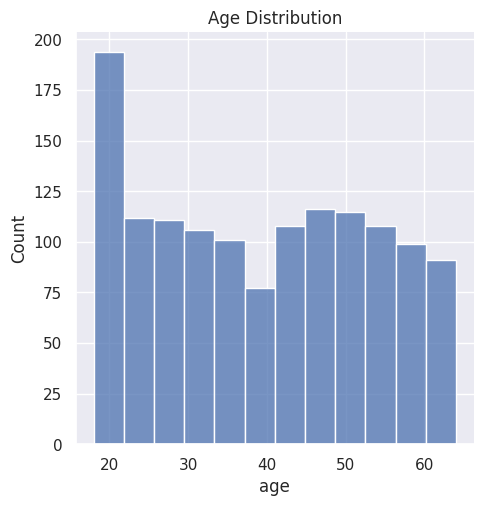

In [ ]:
#distribution of age
plt.figure(figsize=(6,6))
sns.displot(insurance_df['age'])
plt.title('Age Distribution')

Text(0.5, 1.0, 'Sex')

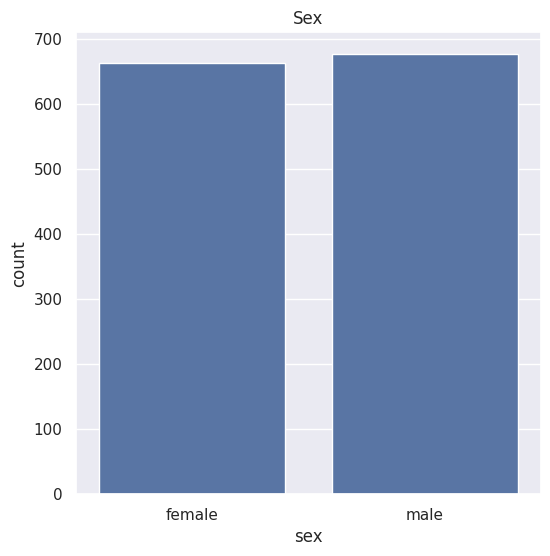

In [ ]:
#sex column
plt.figure(figsize=(6,6))
sns.countplot(insurance_df,x='sex')
plt.title('Sex')

In [ ]:
insurance_df.sex.value_counts()

,count
sex,
male,676
female,662


Text(0.5, 1.0, 'BMI Distribution')

<Figure size 600x600 with 0 Axes>

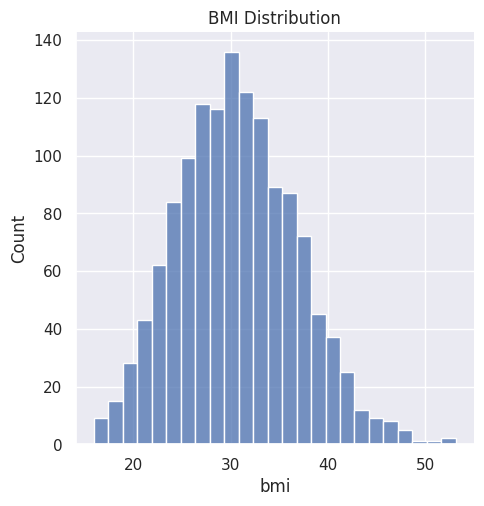

In [ ]:
#distribution of bmi
plt.figure(figsize=(6,6))
sns.displot(insurance_df['bmi'])
plt.title('BMI Distribution')

Text(0.5, 1.0, 'Children')

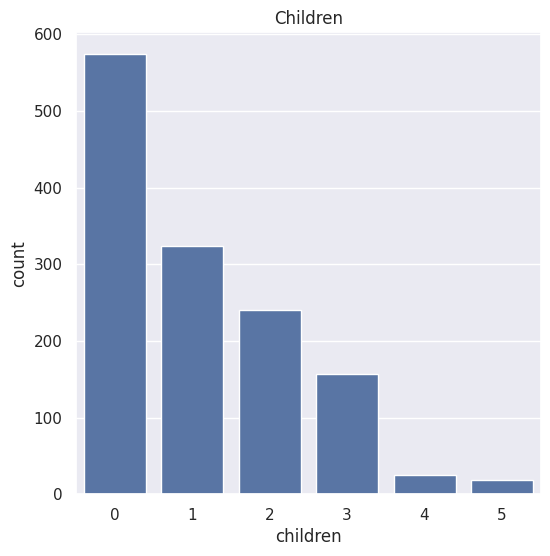

In [ ]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(insurance_df,x='children')
plt.title('Children')

In [ ]:
insurance_df.children.value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


Text(0.5, 1.0, 'Smoker')

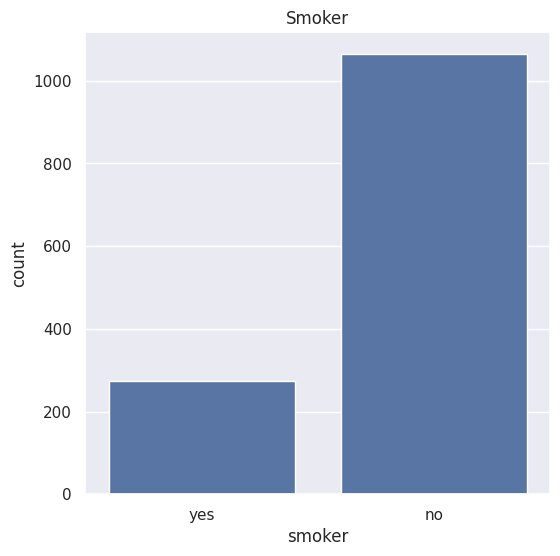

In [ ]:
#smoker column
plt.figure(figsize=(6,6))
sns.countplot(insurance_df,x='smoker')
plt.title('Smoker')

In [ ]:
insurance_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


Text(0.5, 1.0, 'Region')

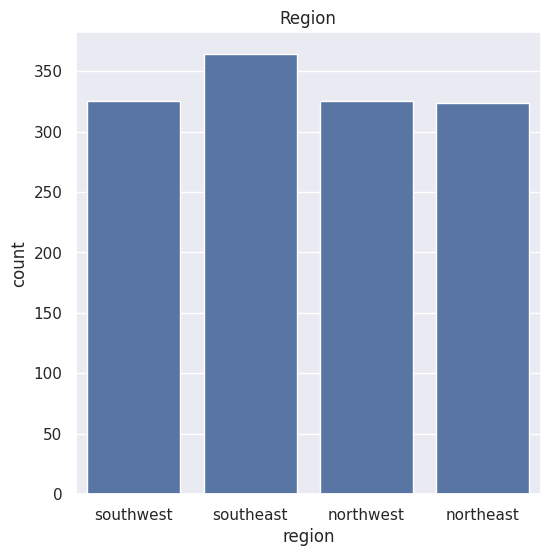

In [ ]:
#region column
plt.figure(figsize=(6,6))
sns.countplot(insurance_df,x='region')
plt.title('Region')

In [ ]:
insurance_df.region.value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


Text(0.5, 1.0, 'Charge Distribution')

<Figure size 600x600 with 0 Axes>

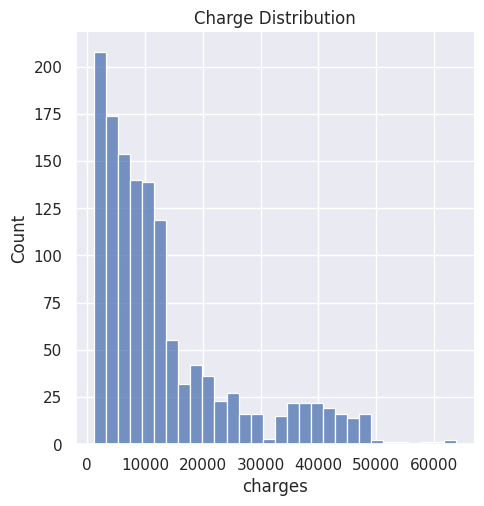

In [ ]:
#distribution of charges
plt.figure(figsize=(6,6))
sns.displot(insurance_df['charges'])
plt.title('Charge Distribution')

#Data Preprocessing

In [ ]:
insurance_df=insurance_df.replace({'sex':{'male':0,'female':1},
                      'smoker':{'no':0,'yes':1},
                      'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}})

/tmp/ipython-input-115-2000483391.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_df=insurance_df.replace({'sex':{'male':0,'female':1},


In [ ]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,0,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


#Splitting The Features And Targets

In [ ]:
X=insurance_df.drop('charges',axis=1)
Y=insurance_df.charges

In [ ]:
X,Y

(      age  sex     bmi  children  smoker  region
 0      19    1  27.900         0       1       1
 1      18    0  33.770         1       0       0
 2      28    0  33.000         3       0       0
 3      33    0  22.705         0       0       2
 4      32    0  28.880         0       0       2
 ...   ...  ...     ...       ...     ...     ...
 1333   50    0  30.970         3       0       2
 1334   18    1  31.920         0       0       3
 1335   18    1  36.850         0       0       0
 1336   21    1  25.800         0       0       1
 1337   61    1  29.070         0       1       2
 
 [1338 rows x 6 columns],
 0       16884.92400
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
            ...     
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 1337    29141.36030
 Name: charges, Length: 1338, dtype: float64)

#Splitting The Data Into Training And Test Data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=4)

In [ ]:
X.shape,X_train.shape,X_test.shape

((1338, 6), (1204, 6), (134, 6))

#Model Training
##Linear Regression

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

#Model Evaluation

In [ ]:
#prediction on training data
X_train_prediction=model.predict(X_train)
accuracy=metrics.r2_score(Y_train,X_train_prediction)
print('R Squared Value: ',accuracy)

R Squared Value:  0.7552705727450559


In [ ]:
#prediction on test data
X_test_prediction=model.predict(X_test)
accuracy=metrics.r2_score(Y_test,X_test_prediction)
print('R Squared Value: ',accuracy)

R Squared Value:  0.7017668940126753


#Building A Predictive System

In [ ]:
def insurance_cost_predictor(parameters):
  input_array=np.asarray(parameters)
  input_reshaped=input_array.reshape(1,-1)
  prediction=model.predict(input_reshaped)
  print('You Insurance Cost Is: ',prediction)

In [ ]:
insurance_cost_predictor((46,1,33.44,1,0,0))

You Insurance Cost Is:  [10563.17026949]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Summary

Our analysis reveals that age, BMI, and smoking status significantly affect medical insurance charges. While Linear Regression performed decently, experimenting with advanced models may yield better accuracy. The insights gained can guide cost prediction strategies.
